<a href="https://colab.research.google.com/github/ervinarosaa/Experience-Job-Level-Classification-and-Prediction/blob/main/Automated_Job_Experience_Level_Prediction_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Automated Job Experience Level Prediction and Classification***

## Preperation

In [ ]:
#@title Import Libraries
import pandas as pd
import numpy as np
from IPython.display import Markdown
from matplotlib.pyplot import show as plot_show
import scipy.stats

In [ ]:
#@title Download Dataset
!gdown 160YtSn6qOFRRGIK9mEAwIWgrkjY6xO-k
!gdown 10MPiD5MlST4mv5k6qAlWex05nwsWbO17
!gdown 12z-EWvwBnD6UeT4KOOPZKcV8ogWvDEVU
!gdown 1IMAYSzftsrQj16bDrVAzFMkld1FwVFUJ
!gdown 1fII5LXHFljUHE2luzKa_lXtICrtF7EKd
!gdown 1vb_Ef8dAYxyi-1GeekFRWqZeZOtaVuu5
!gdown 1XeatNwksz4225DmiVVyMHF17CznC3gmA
!gdown 1L-JISew-2NA23w0kTvJEyR29NnNQevkN

Downloading...
From (original): https://drive.google.com/uc?id=160YtSn6qOFRRGIK9mEAwIWgrkjY6xO-k
From (redirected): https://drive.google.com/uc?id=160YtSn6qOFRRGIK9mEAwIWgrkjY6xO-k&confirm=t&uuid=9a9f1154-1bb2-405a-aead-5caeebb69d74
To: /content/lowongan_kerja.csv
100% 135M/135M [00:00<00:00, 218MB/s]
Downloading...
From: https://drive.google.com/uc?id=10MPiD5MlST4mv5k6qAlWex05nwsWbO17
To: /content/industri.csv
100% 6.06k/6.06k [00:00<00:00, 17.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=12z-EWvwBnD6UeT4KOOPZKcV8ogWvDEVU
To: /content/industri_pekerjaan.csv
100% 622k/622k [00:00<00:00, 82.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IMAYSzftsrQj16bDrVAzFMkld1FwVFUJ
To: /content/industri_perusahaan.csv
100% 378k/378k [00:00<00:00, 79.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fII5LXHFljUHE2luzKa_lXtICrtF7EKd
To: /content/upah.csv
100% 718k/718k [00:00<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vb_Ef8dAYxyi-1GeekFRWq

In [ ]:
#@title Input Dataset
lowongan_kerja = pd.read_csv('/content/lowongan_kerja.csv')
df_industri = pd.read_csv('/content/industri.csv')
df_pekerjaan = pd.read_csv('/content/industri_pekerjaan.csv')
df_perusahaan = pd.read_csv('/content/industri_perusahaan.csv')
upah = pd.read_csv('/content/upah.csv')
karyawan = pd.read_csv('/content/jumlah_karyawan.csv')
skill = pd.read_csv('/content/skill_pekerjaan.csv')
benefit = pd.read_csv('/content/benefit.csv')

## EDA

### Lowongan Pekerjaan

In [ ]:
#@title Tabel Lowongan Pekerjaan

lowongan_kerja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pekerjaan                  33246 non-null  int64  
 1   id_perusahaan                 32592 non-null  float64
 2   judul                         33246 non-null  object 
 3   deskripsi                     33245 non-null  object 
 4   gaji_maksimal                 11111 non-null  float64
 5   gaji_tengah                   2241 non-null   float64
 6   gaji_minimal                  11111 non-null  float64
 7   periode_pembayaran            13352 non-null  object 
 8   jenis_pekerjaan_terformat     33246 non-null  object 
 9   lokasi                        33246 non-null  object 
 10  lamaran                       16238 non-null  float64
 11  diperbolehkan_jarak_jauh      4802 non-null   float64
 12  tampilan                      25886 non-null  float64
 13  u

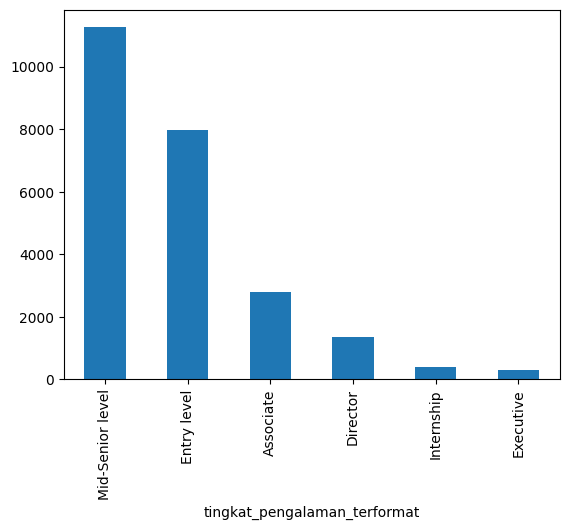

In [ ]:
#@title Distribusi Tingkat pengalaman

lowongan_kerja['tingkat_pengalaman_terformat'].value_counts().plot(kind='bar')
plot_show()

Terlihat distribusi dari tingkat pengalaman tidak seimbang, sehingga tingkat pengalaman akan dikategorikan kembali menjadi jumlah yang lebih sedikit (2 atau 3 kategori)

### Industri

In [ ]:
#@title Industri Perusahaan

df_industri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_industri    229 non-null    int64 
 1   nama_industri  212 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [ ]:
#@title Distribusi Industri Perusahaan

df_perusahaan['industri'].value_counts()

industri
Staffing & Recruiting                780
Staffing and Recruiting              754
Information Technology & Services    691
IT Services and IT Consulting        685
Hospitals and Health Care            576
                                    ... 
Public Policy                          1
Legislative Office                     1
Wireless                               1
Fishery                                1
Retail Art Supplies                    1
Name: count, Length: 235, dtype: int64

Terdapat cukup banyak industri perusahaan yang berbeda yaitu 235 industri dengan distribusi yang cukup beragam yaitu industri Staffing & Recruiting muncul 780 kali sedangkan beberapa industri muncul hanya sekali.

In [ ]:
#@title Jumlah Industri per Perusahaan

df_perusahaan['id_perusahaan'].value_counts()

id_perusahaan
1051620     2
72015472    2
73832604    2
13242175    2
10545600    2
           ..
28389122    1
80006625    1
16154370    1
75193       1
373873      1
Name: count, Length: 11273, dtype: int64

Beberapa perusahan memiliki 2 industri, maka untuk perusahaan-perusahaan tersebut harus dilakukan penggabungan dari nilai-nilai industrinya

In [ ]:
#@title Industri Pekerjaan

df_pekerjaan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44091 entries, 0 to 44090
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id_pekerjaan  44091 non-null  int64
 1   id_industri   44091 non-null  int64
dtypes: int64(2)
memory usage: 689.0 KB


In [ ]:
#@title Jumlah Industri Pekerjaan

df_industri[['nama_industri']]

,nama_industri
0,Defense and Space Manufacturing
1,Computer Hardware Manufacturing
2,Software Development
3,Computer Networking Products
4,"Technology, Information and Internet"
...,...
224,Renewable Energy Power Generation
225,Renewable Energy Equipment Manufacturing
226,Engineering Services
227,Services for Renewable Energy


Terdapat cukup banyak industri pekerjaan yang berbeda yaitu 229 industri

In [ ]:
#@title Jumlah Industri per Pekerjaan

df_pekerjaan['id_pekerjaan'].value_counts()

id_pekerjaan
3749377399    3
3757468088    3
3693068713    3
3699071946    3
3699073806    3
             ..
3701155623    1
3701155578    1
3701155378    1
3701155279    1
3757498232    1
Name: count, Length: 33090, dtype: int64

Sama seperti industri perusahaan, beberapa pekerjaan memiliki lebih dari 1 industri sehingga harus dilakukan penggabungan terhadap industri-industri tersebut

### Upah

In [ ]:
#@title Tabel Upah

upah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13352 entries, 0 to 13351
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_gaji             13352 non-null  int64  
 1   id_pekerjaan        13352 non-null  int64  
 2   gaji_maksimal       11111 non-null  float64
 3   gaji_median         2241 non-null   float64
 4   gaji_minimal        11111 non-null  float64
 5   periode_pembayaran  13352 non-null  object 
 6   mata_uang           13352 non-null  object 
 7   jenis_kompensasi    13352 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 834.6+ KB


In [ ]:
#@title Statistika Upah

upah[['gaji_maksimal', 'gaji_median', 'gaji_minimal']].describe()

,gaji_maksimal,gaji_median,gaji_minimal
count,1.111100e+04,2241.000000,11111.000000
mean,7.289173e+05,32426.170598,62650.128421
std,6.641491e+07,76860.422528,58732.644143
min,1.000000e+01,0.000000,7.250000
25%,5.100000e+01,18.780000,40.945000
50%,8.500000e+04,29.000000,62128.000000
75%,1.400000e+05,42746.000000,100000.000000
max,7.000090e+09,998426.000000,800000.000000


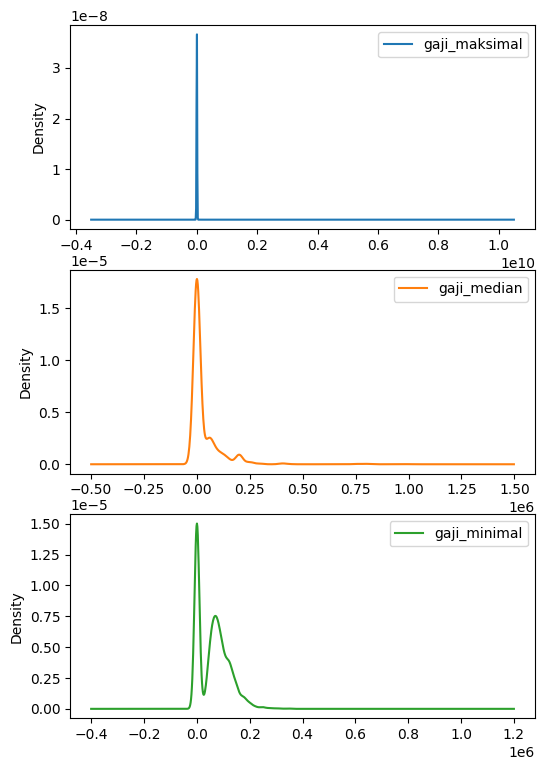

In [ ]:
#@title Distribusi Upah

upah[['gaji_maksimal', 'gaji_median', 'gaji_minimal']].plot(kind='kde', subplots=True, sharex=False, sharey=False, figsize=(6,9))
plot_show()

Dari hasil tesrbut, distribusi dari upah cukup tidak normal, skew, dan memiliki standar deviasi yang tinggi

In [ ]:
#@title Data kategorikal Upah

for column in ['periode_pembayaran', 'mata_uang', 'jenis_kompensasi']:
  print(upah[column].value_counts())
  print()

periode_pembayaran
YEARLY     8009
HOURLY     5036
MONTHLY     224
WEEKLY       82
ONCE          1
Name: count, dtype: int64

mata_uang
USD    13352
Name: count, dtype: int64

jenis_kompensasi
BASE_SALARY    13352
Name: count, dtype: int64



Kolom `mata_uang` dan `jenis_kompensasi` hanya memiliki 1 nilai sehingga tidak akan digunakan

### Skill

In [ ]:
#@title Tabel Skill

skill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56591 entries, 0 to 56590
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_pekerjaan         56591 non-null  int64 
 1   singkatan_kemampuan  56591 non-null  object
dtypes: int64(1), object(1)
memory usage: 884.4+ KB


In [ ]:
#@title Jenis Skill

display(skill['singkatan_kemampuan'].unique())
print('Jumlah: ', skill['singkatan_kemampuan'].unique().size)

array(['ACCT', 'FIN', 'MGMT', 'MNFC', 'HCPR', 'ENG', 'IT', 'ADM', 'SALE',
       'DSGN', 'ART', 'EDU', 'TRNG', 'BD', 'PRJM', 'CNSL', 'STRA', 'OTHR',
       'RSCH', 'GENB', 'MRKT', 'LGL', 'CUST', 'QA', 'PROD', 'ANLS', 'PR',
       'WRT', 'SUPL', 'HR', 'PRDM', 'ADVR', 'PRCH', 'DIST', 'SCI'],
      dtype=object)

Jumlah:  35


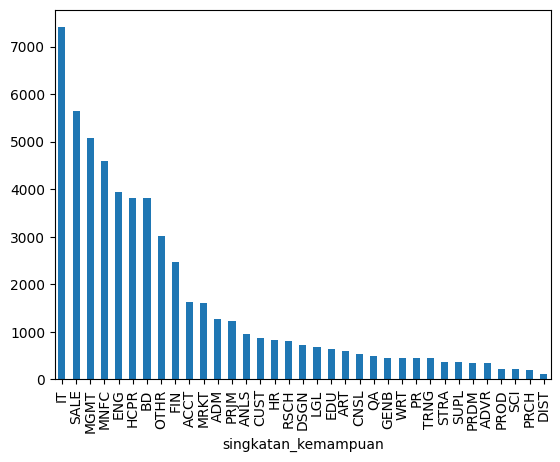

In [ ]:
#@title Distribusi Skill

skill['singkatan_kemampuan'].value_counts().plot(kind='bar')
plot_show()

Distribusi skill terlihat cukup normal

In [ ]:
#@title Jumlah Skill per pekerjaan

skill['id_pekerjaan'].value_counts()

id_pekerjaan
3699408117    3
3757484372    3
3701322491    3
3756926087    3
3701322483    3
             ..
3748840865    1
3748840866    1
3748840868    1
3748841567    1
3757498232    1
Name: count, Length: 32422, dtype: int64

Jumlah skill yang dimiliki suatu pekerjaan dapat mencapai 3 buah

### Benefit

In [ ]:
#@title Tabel benefit

benefit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29325 entries, 0 to 29324
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_pekerjaan  29325 non-null  int64 
 1   benefit       29325 non-null  int64 
 2   jenis         29325 non-null  object
dtypes: int64(2), object(1)
memory usage: 687.4+ KB


In [ ]:
#@title Jenis Benefit

display(benefit['jenis'].unique())
print('Jumlah:', benefit['jenis'].unique().size)

array(['Medical insurance', 'Dental insurance', '401(k)',
       'Paid maternity leave', 'Disability insurance', 'Vision insurance',
       'Tuition assistance', 'Pension plan', 'Paid paternity leave',
       'Commuter benefits', 'Student loan assistance',
       'Child care support'], dtype=object)

Jumlah: 12


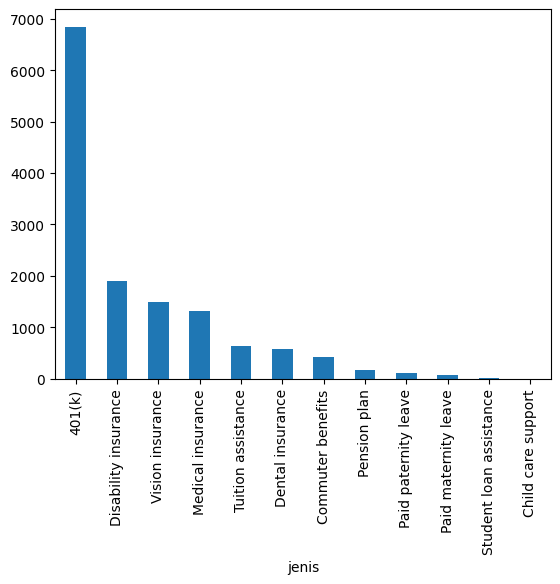

In [ ]:
#@title Distribusi

benefit[benefit['benefit'] == 1]['jenis'].value_counts().plot(kind='bar')
plot_show()

Distribusi dari benefit terlihat cukup tidak rata dengan benefit 401(k) mendominasi data

In [ ]:
#@title Jumlah Benefit per Pekerjaan

benefit[benefit['benefit'] == 1]['id_pekerjaan'].value_counts()

id_pekerjaan
3690868934    7
3757492098    7
3749363353    7
3701305249    7
3757491132    7
             ..
3757455906    1
3749368506    1
3749375488    1
3757494203    1
3757498232    1
Name: count, Length: 8610, dtype: int64

Jumlah benefit yang dimiliki suatu pekerjaan dapat mencapai 7 buah

### Jumlah Karyawan

In [ ]:
#@title Tabel Jumlah Karyawan

karyawan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14275 entries, 0 to 14274
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_perusahaan    14275 non-null  int64  
 1   jumlah_karyawan  14275 non-null  int64  
 2   jumlah_follower  14275 non-null  int64  
 3   waktu_dicatat    14275 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 446.2 KB


In [ ]:
#@title Statistika Jumlah Karyawan

karyawan[['jumlah_karyawan', 'jumlah_follower']].describe()

,jumlah_karyawan,jumlah_follower
count,14275.000000,1.427500e+04
mean,6757.290858,2.010836e+05
std,29981.315418,1.132798e+06
min,0.000000,0.000000e+00
25%,58.000000,2.918000e+03
50%,408.000000,1.745000e+04
75%,2912.500000,7.144950e+04
max,829111.000000,3.188720e+07


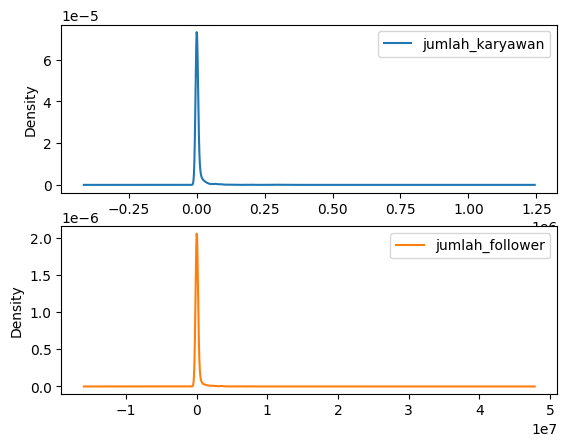

In [ ]:
#@title Distribusi Jumlah Karyawan

karyawan[['jumlah_karyawan', 'jumlah_follower']].plot(kind='kde', subplots=True, sharex=False, sharey=False)
plot_show()

Distribusi jumlah karyawan dan jumlah follower sangat curam namun menyebar luas dengan standar deviasi tinggi

## Data Preprocessing

### **1. Industri**

In [ ]:
#@title Fixing data types

display(
    Markdown('Tipe data dari kolom `nama_industri` adalah:'),
    df_industri['nama_industri'].dtype,
    Markdown('yang seharusnya adalah `str`')
)

df_industri['nama_industri'] = df_industri['nama_industri'].astype(str)
print('datatype changed!')

Tipe data dari kolom `nama_industri` adalah:

dtype('O')

yang seharusnya adalah `str`

datatype changed!


In [ ]:
#@title Penggabungan dataset

# Menggabungkan df_industri ke dalam df_pekerjaan
df_pekerjaan = df_pekerjaan.join(df_industri.set_index('id_industri'), on='id_industri')

# Agregasi df_pekerjaan (karena 1 pekerjaan memiliki lebih dari 1 industri)
df_pekerjaan_agg = df_pekerjaan.groupby('id_pekerjaan').agg({'nama_industri': ', '.join})

# Menggabungkan df_pekerjaan ke dalam dataframe utama, kemudian mengambil kolom 'nama_industri' kemudian mengubahnya menjadi nama_idpekerjaan sehingga yang ditampilkan dataframe utama hanya nama_idpekerjaan
lowongan_pekerjaan = lowongan_kerja.join(df_pekerjaan_agg['nama_industri'].rename('nama_idpekerjaan'), on='id_pekerjaan')

# Agregasi df_perusahaan (karena 1 perusahaan memiliki lebih dari 1 industri)
df_perusahaan_agg = df_perusahaan.groupby('id_perusahaan').agg({'industri': ', '.join})

# Menggabungkan df_perusahaan ke dalam dataframe utama
lowongan_pekerjaan= lowongan_pekerjaan.join(df_perusahaan_agg, on='id_perusahaan').rename(columns={'industri':'nama_idperusahaan'})

#menampilkan data yang telah di join
lowongan_pekerjaan.head(5)

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lokasi,...,deskripsi_keterampilan,domain_penyelenggaraan,disponsori,jenis_pekerjaan,mata_uang,tipe_kompensasi,waktu_kedaluwarsa,waktu_daftar,nama_idpekerjaan,nama_idperusahaan
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40,Medical Equipment Manufacturing,Retail
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,www.click2apply.net,0,FULL_TIME,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00,Industrial Machinery Manufacturing,Industrial Machinery Manufacturing
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,Bachelor's Degree in Mechanical Engineering pr...,www.click2apply.net,0,FULL_TIME,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00,Automation Machinery Manufacturing,Automation Machinery Manufacturing
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 06:40:00,Non-profit Organizations,"Non-profit Organization Management, Non-profit..."
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40,"Retail, Manufacturing, Technology, Information...",Retail


In [ ]:
#@title Match nama_idpekerjaan & nama_idperusahaan

#diberikan nama industri_values untuk kolom 'id_pekerjaan', 'id_perusahaan', 'nama_idpekerjaan', 'nama_idperusahaan'
industri_values = lowongan_pekerjaan[['id_pekerjaan', 'id_perusahaan', 'nama_idpekerjaan', 'nama_idperusahaan']].copy()

industri_values['industri sama/tidak'] = industri_values['nama_idpekerjaan'] == industri_values['nama_idperusahaan']

# Menghitung jumlah kolom industri yang sama/tidak
counts = industri_values ['industri sama/tidak'].value_counts()

display(
    Markdown(f"""
    Jumlah kolom yang sama = {counts[True]}
    Jumlah kolom yang beda = {counts[False]}
    """)
)


    Jumlah kolom yang sama = 12229
    Jumlah kolom yang beda = 21017
    

In [ ]:
#@title Dataframe Industri
industi_columnns = list(industri_values.columns)
industi_columnns.remove('industri sama/tidak')

display(
    Markdown("""
    Bagian yang diambil adalah industri, maka kolomnya adalah:
    id_pekerjaan, id_perusahan, nama_idpekerjaan, nama_idperusahaan
    """)
)

lowongan_industri = lowongan_pekerjaan[industi_columnns].copy()


    Bagian yang diambil adalah industri, maka kolomnya adalah:
    id_pekerjaan, id_perusahan, nama_idpekerjaan, nama_idperusahaan
    

In [ ]:
#@title Handling Missing Value

# Menghitung jumlah nilai yang hilang untuk setiap kolom sebelum dropna
missing_values_before = lowongan_industri.isnull().sum()

# Menghapus baris dengan nilai yang hilang
lowongan_industri = lowongan_industri.dropna()

# Menghitung jumlah nilai yang hilang untuk setiap kolom setelah dropna
missing_values_after = lowongan_industri.isnull().sum()

# Membuat string tabel Markdown untuk nilai yang hilang sebelum dropna
missing_values_table_before = "\n".join([f"| {col} | {val} |" for col, val in missing_values_before.items()])

# Membuat string tabel Markdown untuk nilai yang hilang setelah dropna
missing_values_table_after = "\n".join([f"| {col} | {val} |" for col, val in missing_values_after.items()])

# Menambahkan header tabel Markdown untuk "before" dan "after"
markdown_table = f"""
### Sebelum Handling Missing Value
| Kolom | Jumlah Missing Value|
|-------|---------------------|
{missing_values_table_before}

### Setelah Handling Missing Value
| Kolom | Jumlah Missing Value |
|-------|---------------------|
{missing_values_table_after}
"""

# Menampilkan hasil
display(Markdown(markdown_table))


### Sebelum Handling Missing Value
| Kolom | Jumlah Missing Value|
|-------|---------------------|
| id_pekerjaan | 0 |
| id_perusahaan | 654 |
| nama_idpekerjaan | 544 |
| nama_idperusahaan | 712 |

### Setelah Handling Missing Value
| Kolom | Jumlah Missing Value |
|-------|---------------------|
| id_pekerjaan | 0 |
| id_perusahaan | 0 |
| nama_idpekerjaan | 0 |
| nama_idperusahaan | 0 |


In [ ]:
lowongan_industri.info()

display(Markdown("Setelah penghapusan baris pada saat handling missing value, dapat dikatakan jumlah baris yang tersisa masih banyak sehingga tidak terlalu mempengaruhi data"))

<class 'pandas.core.frame.DataFrame'>
Index: 32533 entries, 0 to 33245
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_pekerjaan       32533 non-null  int64  
 1   id_perusahaan      32533 non-null  float64
 2   nama_idpekerjaan   32533 non-null  object 
 3   nama_idperusahaan  32533 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


Setelah penghapusan baris pada saat handling missing value, dapat dikatakan jumlah baris yang tersisa masih banyak sehingga tidak terlalu mempengaruhi data

### **2. Upah**

In [ ]:
#@title DataFrame Upah

lowongan_upah = lowongan_kerja[['id_pekerjaan', 'gaji_maksimal', 'gaji_tengah', 'gaji_minimal', 'periode_pembayaran']].copy()
lowongan_upah.head()

,id_pekerjaan,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran
0,3757940104,NaN,5250.00,NaN,MONTHLY
1,3757940025,NaN,NaN,NaN,NaN
2,3757938019,NaN,NaN,NaN,NaN
3,3757938018,NaN,22.27,NaN,HOURLY
4,3757937095,275834.0,NaN,205956.0,YEARLY


In [ ]:
#@title Handling Missing Value

# Menghitung jumlah nilai yang hilang untuk setiap kolom sebelum dropna
missing_upah_before = lowongan_upah.isnull().sum()

# Imputasi gaji_tengah dengan operasi dari gaji_maksimal dan gaji_minimal
lowongan_upah.loc[lowongan_upah['gaji_tengah'].isna(), 'gaji_tengah'] = (lowongan_upah['gaji_maksimal'] + lowongan_upah['gaji_minimal'])/2

# Menghapus baris dengan nilai yang hilang
lowongan_upah= lowongan_upah.dropna()

# Menghitung jumlah nilai yang hilang untuk setiap kolom setelah dropna
missing_upah_after = lowongan_industri.isnull().sum()

# Membuat string tabel Markdown untuk nilai yang hilang sebelum dropna
missing_upah_table_before = "\n".join([f"| {col} | {val} |" for col, val in missing_upah_before.items()])

# Membuat string tabel Markdown untuk nilai yang hilang setelah dropna
missing_upah_table_after = "\n".join([f"| {col} | {val} |" for col, val in missing_upah_after.items()])

# Menambahkan header tabel Markdown untuk "before" dan "after"
markdown_table = f"""
### Sebelum Handling Missing Value
| Kolom | Jumlah Missing Value|
|-------|---------------------|
{missing_upah_table_before}

### Setelah Handling Missing Value
| Kolom | Jumlah Missing Value |
|-------|---------------------|
{missing_upah_table_after}
"""

# Menampilkan hasil
display(Markdown(markdown_table))


### Sebelum Handling Missing Value
| Kolom | Jumlah Missing Value|
|-------|---------------------|
| id_pekerjaan | 0 |
| gaji_maksimal | 22135 |
| gaji_tengah | 31005 |
| gaji_minimal | 22135 |
| periode_pembayaran | 19894 |

### Setelah Handling Missing Value
| Kolom | Jumlah Missing Value |
|-------|---------------------|
| id_pekerjaan | 0 |
| id_perusahaan | 0 |
| nama_idpekerjaan | 0 |
| nama_idperusahaan | 0 |


In [ ]:
#@title Convert Gaji
# Definisikan fungsi untuk konversi nilai berdasarkan periode_pembayaran
def convert_gaji(gaji, periode_pembayaran):
    if periode_pembayaran in ['HOURLY', 'ONCE']:
        return gaji * (252 * 8)
    elif periode_pembayaran == 'WEEKLY':
        return gaji * 52
    elif periode_pembayaran == 'MONTHLY':
        return gaji * 12
    else:
        return gaji

# Terapkan fungsi pada DataFrame
lowongan_upah['gaji_tengah_convert'] = lowongan_upah.apply(lambda row: convert_gaji(row['gaji_tengah'], row['periode_pembayaran']), axis=1)
lowongan_upah['gaji_maksimal_convert'] = lowongan_upah.apply(lambda row: convert_gaji(row['gaji_maksimal'], row['periode_pembayaran']), axis=1)
lowongan_upah['gaji_minimal_convert'] = lowongan_upah.apply(lambda row: convert_gaji(row['gaji_minimal'], row['periode_pembayaran']), axis=1)
lowongan_upah.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11111 entries, 4 to 33245
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_pekerjaan           11111 non-null  int64  
 1   gaji_maksimal          11111 non-null  float64
 2   gaji_tengah            11111 non-null  float64
 3   gaji_minimal           11111 non-null  float64
 4   periode_pembayaran     11111 non-null  object 
 5   gaji_tengah_convert    11111 non-null  float64
 6   gaji_maksimal_convert  11111 non-null  float64
 7   gaji_minimal_convert   11111 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 781.2+ KB


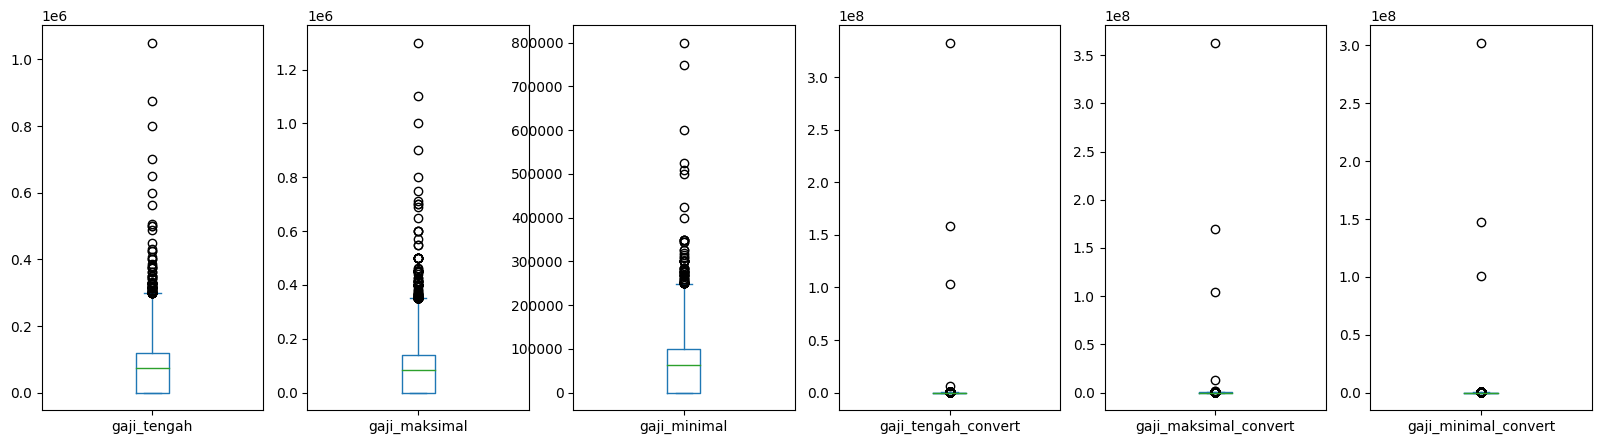

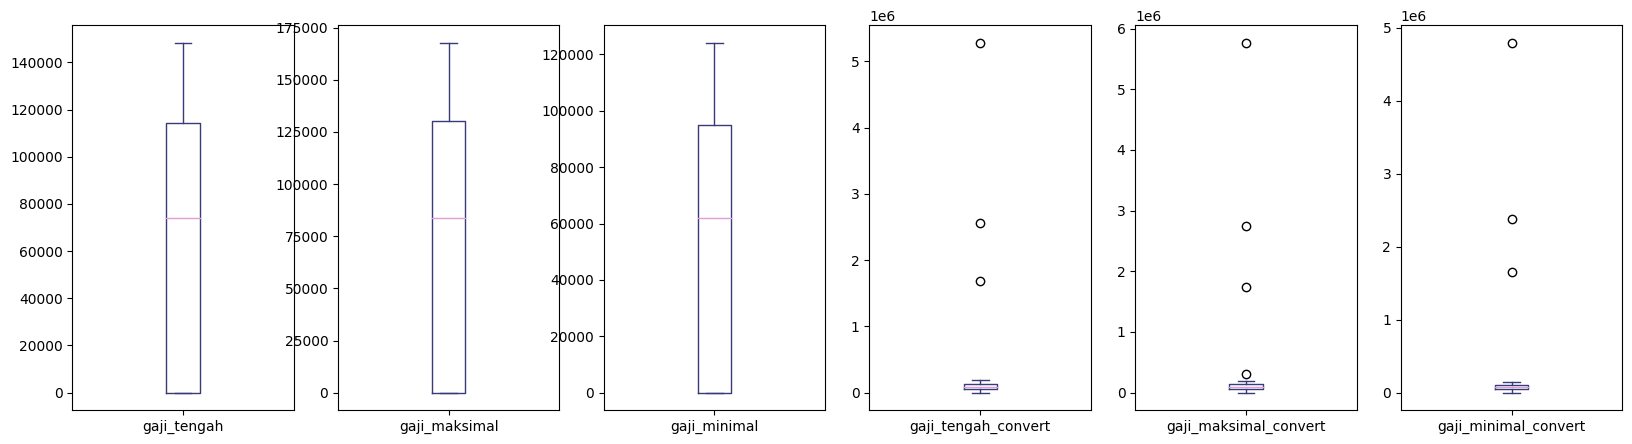

<class 'pandas.core.frame.DataFrame'>
Index: 11111 entries, 4 to 33245
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_pekerjaan           11111 non-null  int64  
 1   gaji_maksimal          11111 non-null  float64
 2   gaji_tengah            11111 non-null  float64
 3   gaji_minimal           11111 non-null  float64
 4   periode_pembayaran     11111 non-null  object 
 5   gaji_tengah_convert    11111 non-null  float64
 6   gaji_maksimal_convert  11111 non-null  float64
 7   gaji_minimal_convert   11111 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 781.2+ KB


In [ ]:
#@title Outlier
numeric = ['gaji_tengah', 'gaji_maksimal', 'gaji_minimal', 'gaji_tengah_convert', 'gaji_maksimal_convert', 'gaji_minimal_convert']

lowongan_upah_cleaned = lowongan_upah.copy()

# Boxplot data numerik
lowongan_upah_cleaned[numeric].plot(subplots=True, kind='box', figsize=(20,5))
plot_show()

# Fungsi imputer median
def handle_outlier_median(df, column):
    median = df[column].median()
    df[column] = np.where(df[column] > 2 * median, (median + df[column])/2, df[column])
    df[column] = np.where(df[column] < -2 * median, (median + df[column])/2, df[column])

# Handling outlier dengan median
for col in numeric:
    handle_outlier_median(lowongan_upah_cleaned, numeric)

# Boxplot hasil penghapusan
lowongan_upah_cleaned[numeric].plot(kind='box', subplots=True, figsize=(20,5), colormap = 'tab20b')
plot_show()
lowongan_upah_cleaned.info()

### **3. Skill**

In [ ]:
#@title Encoding

skill_encoded = pd.get_dummies(skill, columns=['singkatan_kemampuan']).groupby('id_pekerjaan').sum()
skill_encoded.head()

,singkatan_kemampuan_ACCT,singkatan_kemampuan_ADM,singkatan_kemampuan_ADVR,singkatan_kemampuan_ANLS,singkatan_kemampuan_ART,singkatan_kemampuan_BD,singkatan_kemampuan_CNSL,singkatan_kemampuan_CUST,singkatan_kemampuan_DIST,singkatan_kemampuan_DSGN,...,singkatan_kemampuan_PRJM,singkatan_kemampuan_PROD,singkatan_kemampuan_QA,singkatan_kemampuan_RSCH,singkatan_kemampuan_SALE,singkatan_kemampuan_SCI,singkatan_kemampuan_STRA,singkatan_kemampuan_SUPL,singkatan_kemampuan_TRNG,singkatan_kemampuan_WRT
id_pekerjaan,,,,,,,,,,,,,,,,,,,,,
3958427,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
85008768,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
102339515,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
108965123,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133114754,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#@title Joining

lowongan_skill = lowongan_kerja[['id_pekerjaan']].join(skill_encoded, on='id_pekerjaan').set_index('id_pekerjaan')
lowongan_skill.head()

,singkatan_kemampuan_ACCT,singkatan_kemampuan_ADM,singkatan_kemampuan_ADVR,singkatan_kemampuan_ANLS,singkatan_kemampuan_ART,singkatan_kemampuan_BD,singkatan_kemampuan_CNSL,singkatan_kemampuan_CUST,singkatan_kemampuan_DIST,singkatan_kemampuan_DSGN,...,singkatan_kemampuan_PRJM,singkatan_kemampuan_PROD,singkatan_kemampuan_QA,singkatan_kemampuan_RSCH,singkatan_kemampuan_SALE,singkatan_kemampuan_SCI,singkatan_kemampuan_STRA,singkatan_kemampuan_SUPL,singkatan_kemampuan_TRNG,singkatan_kemampuan_WRT
id_pekerjaan,,,,,,,,,,,,,,,,,,,,,
3757940104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3757940025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3757938019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3757938018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3757937095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#@title Missing Values
display(Markdown('Karena skill merupakan data `boolean`, maka bagi skill dengan nilai `NaN` akan diisi nilai `0`'))

lowongan_skill.fillna(0, inplace=True)
lowongan_skill.info()

Karena skill merupakan data `boolean`, maka bagi skill dengan nilai `NaN` akan diisi nilai `0`

<class 'pandas.core.frame.DataFrame'>
Index: 33246 entries, 3757940104 to 3958427
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   singkatan_kemampuan_ACCT  33246 non-null  float64
 1   singkatan_kemampuan_ADM   33246 non-null  float64
 2   singkatan_kemampuan_ADVR  33246 non-null  float64
 3   singkatan_kemampuan_ANLS  33246 non-null  float64
 4   singkatan_kemampuan_ART   33246 non-null  float64
 5   singkatan_kemampuan_BD    33246 non-null  float64
 6   singkatan_kemampuan_CNSL  33246 non-null  float64
 7   singkatan_kemampuan_CUST  33246 non-null  float64
 8   singkatan_kemampuan_DIST  33246 non-null  float64
 9   singkatan_kemampuan_DSGN  33246 non-null  float64
 10  singkatan_kemampuan_EDU   33246 non-null  float64
 11  singkatan_kemampuan_ENG   33246 non-null  float64
 12  singkatan_kemampuan_FIN   33246 non-null  float64
 13  singkatan_kemampuan_GENB  33246 non-null  float64
 14  

### **4. Benefit**

In [ ]:
#@title Formating

benefit1 = benefit[benefit['benefit'] != 0].reset_index(drop=True).drop(['benefit'], axis='columns')
benefit1.head()

,id_pekerjaan,jenis
0,3691763971,Dental insurance
1,3691763971,Disability insurance
2,3691763971,401(k)
3,3691793575,Medical insurance
4,3691794313,Vision insurance


In [ ]:
#@title Encoding

benefit_encoded = pd.get_dummies(benefit1, columns=['jenis']).groupby('id_pekerjaan').sum()
benefit_encoded.head()

,jenis_401(k),jenis_Child care support,jenis_Commuter benefits,jenis_Dental insurance,jenis_Disability insurance,jenis_Medical insurance,jenis_Paid maternity leave,jenis_Paid paternity leave,jenis_Pension plan,jenis_Student loan assistance,jenis_Tuition assistance,jenis_Vision insurance
id_pekerjaan,,,,,,,,,,,,
529257371,0,0,0,1,0,1,0,0,0,0,0,1
967848246,1,0,0,0,0,0,0,0,0,0,0,0
2148434014,0,0,0,0,1,0,0,0,0,0,0,0
2148434019,0,0,0,0,1,0,0,0,0,0,0,0
2148434137,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#@title Joining

lowongan_benefit = lowongan_kerja[['id_pekerjaan']].join(benefit_encoded, on='id_pekerjaan').set_index('id_pekerjaan')
lowongan_benefit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33246 entries, 3757940104 to 3958427
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   jenis_401(k)                   8610 non-null   float64
 1   jenis_Child care support       8610 non-null   float64
 2   jenis_Commuter benefits        8610 non-null   float64
 3   jenis_Dental insurance         8610 non-null   float64
 4   jenis_Disability insurance     8610 non-null   float64
 5   jenis_Medical insurance        8610 non-null   float64
 6   jenis_Paid maternity leave     8610 non-null   float64
 7   jenis_Paid paternity leave     8610 non-null   float64
 8   jenis_Pension plan             8610 non-null   float64
 9   jenis_Student loan assistance  8610 non-null   float64
 10  jenis_Tuition assistance       8610 non-null   float64
 11  jenis_Vision insurance         8610 non-null   float64
dtypes: float64(12)
memory usage: 3.3 MB


In [ ]:
#@title Missing Values

display(Markdown('Karena benefit merupakan data `boolean`, maka bagi benefit dengan nilai `NaN` akan diisi nilai `0`'))

lowongan_benefit.fillna(0, inplace=True)
lowongan_benefit.info()

Karena benefit merupakan data `boolean`, maka bagi benefit dengan nilai `NaN` akan diisi nilai `0`

<class 'pandas.core.frame.DataFrame'>
Index: 33246 entries, 3757940104 to 3958427
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   jenis_401(k)                   33246 non-null  float64
 1   jenis_Child care support       33246 non-null  float64
 2   jenis_Commuter benefits        33246 non-null  float64
 3   jenis_Dental insurance         33246 non-null  float64
 4   jenis_Disability insurance     33246 non-null  float64
 5   jenis_Medical insurance        33246 non-null  float64
 6   jenis_Paid maternity leave     33246 non-null  float64
 7   jenis_Paid paternity leave     33246 non-null  float64
 8   jenis_Pension plan             33246 non-null  float64
 9   jenis_Student loan assistance  33246 non-null  float64
 10  jenis_Tuition assistance       33246 non-null  float64
 11  jenis_Vision insurance         33246 non-null  float64
dtypes: float64(12)
memory usage: 3.3 MB


### **5. Other**

In [ ]:
karyawan['id_perusahaan'].value_counts()

id_perusahaan
1318        6
1028        6
1681        6
3626        6
1603        5
           ..
1456190     1
79804728    1
3954657     1
49455       1
373873      1
Name: count, Length: 11323, dtype: int64

In [ ]:
karyawan_max = karyawan.drop(['waktu_dicatat'], axis='columns').groupby('id_perusahaan').max()
karyawan_max.reset_index()['id_perusahaan'].value_counts()

id_perusahaan
1009         1
10122698     1
9671432      1
9682879      1
9714055      1
            ..
284898       1
285027       1
285650       1
285809       1
101174062    1
Name: count, Length: 11323, dtype: int64

In [ ]:
#@title Join
lowongan_karyawan = lowongan_kerja.join(karyawan_max, on='id_perusahaan')
lowongan_karyawan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pekerjaan                  33246 non-null  int64  
 1   id_perusahaan                 32592 non-null  float64
 2   judul                         33246 non-null  object 
 3   deskripsi                     33245 non-null  object 
 4   gaji_maksimal                 11111 non-null  float64
 5   gaji_tengah                   2241 non-null   float64
 6   gaji_minimal                  11111 non-null  float64
 7   periode_pembayaran            13352 non-null  object 
 8   jenis_pekerjaan_terformat     33246 non-null  object 
 9   lokasi                        33246 non-null  object 
 10  lamaran                       16238 non-null  float64
 11  diperbolehkan_jarak_jauh      4802 non-null   float64
 12  tampilan                      25886 non-null  float64
 13  u

In [ ]:
#@title Drop Kolom
lowongan_karyawan_pp = lowongan_karyawan.drop(['id_perusahaan', 'judul', 'deskripsi', 'gaji_maksimal', 'gaji_tengah', 'gaji_minimal', 'periode_pembayaran',
               'deskripsi_keterampilan', 'lamaran', 'url_posting_pekerjaan', 'url_pendaftaran',
               'domain_penyelenggaraan', 'tampilan', 'mata_uang', 'tipe_kompensasi', ], axis=1)
lowongan_karyawan_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pekerjaan                  33246 non-null  int64  
 1   jenis_pekerjaan_terformat     33246 non-null  object 
 2   lokasi                        33246 non-null  object 
 3   diperbolehkan_jarak_jauh      4802 non-null   float64
 4   tipe_pendaftaran              33246 non-null  object 
 5   tingkat_pengalaman_terformat  24065 non-null  object 
 6   disponsori                    33246 non-null  int64  
 7   jenis_pekerjaan               33246 non-null  object 
 8   waktu_kedaluwarsa             33246 non-null  object 
 9   waktu_daftar                  33246 non-null  object 
 10  jumlah_karyawan               32590 non-null  float64
 11  jumlah_follower               32590 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 3.0+ MB


In [ ]:
#@title Handling Missing Value
# Menghitung jumlah nilai yang hilang untuk setiap kolom sebelum dropna
missing_lowongan_before = lowongan_karyawan_pp.isnull().sum()
missing_lowongan_before = missing_lowongan_before[missing_lowongan_before > 0]

lowongan_karyawan_pp['diperbolehkan_jarak_jauh'].fillna(0, inplace=True)

# Menghitung jumlah nilai yang hilang untuk setiap kolom setelah dropna
missing_lowongan_after = lowongan_karyawan_pp.isnull().sum()
missing_lowongan_after = missing_lowongan_after[missing_lowongan_after > 0]

# Membuat string tabel Markdown untuk nilai yang hilang sebelum dropna
missing_lowongan_table_before = "\n".join([f"| {col} | {val} |" for col, val in missing_lowongan_before.items()])

# Membuat string tabel Markdown untuk nilai yang hilang setelah dropna
missing_lowongan_table_after = "\n".join([f"| {col} | {val} |" for col, val in missing_lowongan_after.items()])

# Menambahkan header tabel Markdown untuk "before" dan "after"
markdown_table_lowongan = f"""
### Sebelum Handling Missing Value
| Kolom | Jumlah Missing Value |
|-------|---------------------|
{missing_lowongan_table_before}

### Setelah Handling Missing Value
| Kolom | Jumlah Missing Value |
|-------|---------------------|
{missing_lowongan_table_after}
"""

# Menampilkan hasil
display(Markdown(markdown_table_lowongan))


### Sebelum Handling Missing Value
| Kolom | Jumlah Missing Value |
|-------|---------------------|
| diperbolehkan_jarak_jauh | 28444 |
| tingkat_pengalaman_terformat | 9181 |
| jumlah_karyawan | 656 |
| jumlah_follower | 656 |

### Setelah Handling Missing Value
| Kolom | Jumlah Missing Value |
|-------|---------------------|
| tingkat_pengalaman_terformat | 9181 |
| jumlah_karyawan | 656 |
| jumlah_follower | 656 |


### **Join Lowongan - Upah - Industri - Skill - Benefit**

In [ ]:
#@title Join Dataframe
joined_df3 = lowongan_karyawan_pp.set_index('id_pekerjaan') \
            .join(lowongan_upah_cleaned.set_index('id_pekerjaan'), how='inner') \
            .join(lowongan_industri.set_index('id_pekerjaan'), how='inner') \
            .join(lowongan_skill) \
            .join(lowongan_benefit)\
            .reset_index()
joined_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10897 entries, 0 to 10896
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_pekerjaan                   10897 non-null  int64  
 1   jenis_pekerjaan_terformat      10897 non-null  object 
 2   lokasi                         10897 non-null  object 
 3   diperbolehkan_jarak_jauh       10897 non-null  float64
 4   tipe_pendaftaran               10897 non-null  object 
 5   tingkat_pengalaman_terformat   8218 non-null   object 
 6   disponsori                     10897 non-null  int64  
 7   jenis_pekerjaan                10897 non-null  object 
 8   waktu_kedaluwarsa              10897 non-null  object 
 9   waktu_daftar                   10897 non-null  object 
 10  jumlah_karyawan                10897 non-null  float64
 11  jumlah_follower                10897 non-null  float64
 12  gaji_maksimal                  10897 non-null 

In [ ]:
#@title Missing Values

column_target = joined_df3[['id_pekerjaan', 'tingkat_pengalaman_terformat']].copy()

joined_df3.drop(['tingkat_pengalaman_terformat'], axis=1, inplace=True)
joined_df3_clean = joined_df3.copy()
joined_df3_clean = joined_df3_clean.dropna()

joined_df3_clean = joined_df3_clean.merge(column_target, how='left', on='id_pekerjaan')
joined_df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10897 entries, 0 to 10896
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_pekerjaan                   10897 non-null  int64  
 1   jenis_pekerjaan_terformat      10897 non-null  object 
 2   lokasi                         10897 non-null  object 
 3   diperbolehkan_jarak_jauh       10897 non-null  float64
 4   tipe_pendaftaran               10897 non-null  object 
 5   disponsori                     10897 non-null  int64  
 6   jenis_pekerjaan                10897 non-null  object 
 7   waktu_kedaluwarsa              10897 non-null  object 
 8   waktu_daftar                   10897 non-null  object 
 9   jumlah_karyawan                10897 non-null  float64
 10  jumlah_follower                10897 non-null  float64
 11  gaji_maksimal                  10897 non-null  float64
 12  gaji_tengah                    10897 non-null 

In [ ]:
#@title Single-Valued Columns

single = [column for column in joined_df3_clean.columns if joined_df3_clean[column].unique().size == 1]
single

[]

In [ ]:
#@title Dropping Deprecated Columns

df_output = joined_df3_clean.copy() \
            .drop(single, axis='columns') \
            .drop(['id_perusahaan'], axis='columns')
df_output.head()

,id_pekerjaan,jenis_pekerjaan_terformat,lokasi,diperbolehkan_jarak_jauh,tipe_pendaftaran,disponsori,jenis_pekerjaan,waktu_kedaluwarsa,waktu_daftar,jumlah_karyawan,...,jenis_Dental insurance,jenis_Disability insurance,jenis_Medical insurance,jenis_Paid maternity leave,jenis_Paid paternity leave,jenis_Pension plan,jenis_Student loan assistance,jenis_Tuition assistance,jenis_Vision insurance,tingkat_pengalaman_terformat
0,3757937095,Full-time,United States,1.0,OffsiteApply,0,FULL_TIME,2023-12-04 08:53:20,2023-11-04 09:26:40,1260.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mid-Senior level
1,3757935381,Full-time,United States,1.0,OffsiteApply,0,FULL_TIME,2023-12-04 08:53:20,2023-11-04 09:26:40,894.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Entry level
2,3757935001,Full-time,"Coeur d'Alene, ID",1.0,ComplexOnsiteApply,0,FULL_TIME,2023-12-04 06:06:40,2023-11-04 06:40:00,363.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mid-Senior level
3,3757934347,Full-time,"Waukesha, WI",0.0,OffsiteApply,0,FULL_TIME,2023-12-04 08:53:20,2023-11-04 06:40:00,244.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Entry level
4,3757934319,Full-time,"Orlando, FL",0.0,OffsiteApply,0,FULL_TIME,2023-12-04 06:06:40,2023-11-04 06:40:00,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mid-Senior level


In [ ]:
#@title Setting Data types
column_target = df_output[['id_pekerjaan', 'tingkat_pengalaman_terformat']].copy()
df_output.drop(['tingkat_pengalaman_terformat'], axis=1, inplace=True)

integer = ['id_pekerjaan', 'jumlah_karyawan', 'jumlah_follower']
floating = ['gaji_tengah', 'gaji_maksimal', 'gaji_minimal', 'gaji_tengah_convert', 'gaji_maksimal_convert', 'gaji_minimal_convert']
strings = ['jenis_pekerjaan_terformat', 'lokasi', 'tipe_pendaftaran', 'jenis_pekerjaan', 'periode_pembayaran', 'nama_idpekerjaan', 'nama_idperusahaan']
times = ['waktu_kedaluwarsa', 'waktu_daftar']
boolean = [column for column in df_output.columns if column not in integer + floating + strings + times]

df_output[integer] = df_output[integer].astype(int)
df_output[floating] = df_output[floating].astype(float)
df_output[strings] = df_output[strings].astype(str)
df_output[boolean] = df_output[boolean].astype(bool)
for column in times:
    df_output[column] = pd.to_datetime(df_output[column])

df_output = df_output.merge(column_target, how='left', on='id_pekerjaan')
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10897 entries, 0 to 10896
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id_pekerjaan                   10897 non-null  int64         
 1   jenis_pekerjaan_terformat      10897 non-null  object        
 2   lokasi                         10897 non-null  object        
 3   diperbolehkan_jarak_jauh       10897 non-null  bool          
 4   tipe_pendaftaran               10897 non-null  object        
 5   disponsori                     10897 non-null  bool          
 6   jenis_pekerjaan                10897 non-null  object        
 7   waktu_kedaluwarsa              10897 non-null  datetime64[ns]
 8   waktu_daftar                   10897 non-null  datetime64[ns]
 9   jumlah_karyawan                10897 non-null  int64         
 10  jumlah_follower                10897 non-null  int64         
 11  gaji_maksimal  

## Modeling

In [ ]:
#@title Data

data = df_output.copy()
data = data.drop(columns=['id_pekerjaan'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10897 entries, 0 to 10896
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   jenis_pekerjaan_terformat      10897 non-null  object        
 1   lokasi                         10897 non-null  object        
 2   diperbolehkan_jarak_jauh       10897 non-null  bool          
 3   tipe_pendaftaran               10897 non-null  object        
 4   disponsori                     10897 non-null  bool          
 5   jenis_pekerjaan                10897 non-null  object        
 6   waktu_kedaluwarsa              10897 non-null  datetime64[ns]
 7   waktu_daftar                   10897 non-null  datetime64[ns]
 8   jumlah_karyawan                10897 non-null  int64         
 9   jumlah_follower                10897 non-null  int64         
 10  gaji_maksimal                  10897 non-null  float64       
 11  gaji_tengah    

In [ ]:
#@title Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Label Encoding Data Kategorik
object_columns_kategoric = ['lokasi', 'nama_idpekerjaan', 'nama_idperusahaan']
for col in object_columns_kategoric:
  data[col] = encoder.fit_transform(data[col])

# Label Encoding Data Ordinal periode_pembayaran
data['periode_pembayaran'] = data['periode_pembayaran'].map({'ONCE':1, 'HOURLY':2, 'WEEKLY':3, 'MONTHLY':4, 'YEARLY':5})

# Label Encoding Data Ordinal tingkat_pengalaman_terformat
nan_values = {}
nan_values['tingkat_pengalaman_terformat'] = data['tingkat_pengalaman_terformat'].isna()
data['tingkat_pengalaman_terformat'].fillna("NaN", inplace=True)
data['tingkat_pengalaman_terformat'] = data['tingkat_pengalaman_terformat'].map({'Internship':1, 'Entry level':2, 'Associate':3, 'Mid-Senior level':4, 'Director':5, 'Executive':6}).astype('Int64')
data['tingkat_pengalaman_terformat'] = data['tingkat_pengalaman_terformat'].where(~nan_values['tingkat_pengalaman_terformat'], pd.NA)

# Encoding jenis_pekerjaan dan jenis pekerjaan terformat
object_columns_one_hot = ['jenis_pekerjaan_terformat', 'tipe_pendaftaran', 'jenis_pekerjaan']
for col in object_columns_one_hot:
  result = pd.get_dummies(data[col], prefix=col)
  data = data.drop(col, axis=1)
  data = data.join(result)

# Convert boolean to integer
boolean_columns = data.select_dtypes(include=['bool']).columns.tolist()
for col in boolean_columns:
    data[col] = data[col].astype(int)

data.head(3)

,lokasi,diperbolehkan_jarak_jauh,disponsori,waktu_kedaluwarsa,waktu_daftar,jumlah_karyawan,jumlah_follower,gaji_maksimal,gaji_tengah,gaji_minimal,...,jenis_pekerjaan_terformat_Temporary,tipe_pendaftaran_ComplexOnsiteApply,tipe_pendaftaran_OffsiteApply,tipe_pendaftaran_SimpleOnsiteApply,jenis_pekerjaan_CONTRACT,jenis_pekerjaan_FULL_TIME,jenis_pekerjaan_INTERNSHIP,jenis_pekerjaan_OTHER,jenis_pekerjaan_PART_TIME,jenis_pekerjaan_TEMPORARY
0,1956,1,0,2023-12-04 08:53:20,2023-11-04 09:26:40,1260,51933,131904.5,115903.75,98085.0,...,0,0,1,0,0,1,0,0,0,0
1,1956,1,0,2023-12-04 08:53:20,2023-11-04 09:26:40,894,72044,64000.0,61000.00,58000.0,...,0,0,1,0,0,1,0,0,0,0
2,373,1,0,2023-12-04 06:06:40,2023-11-04 06:40:00,363,35922,150446.0,115055.00,93564.0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
#@title Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Select numeric column
numeric_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()

#Remove Target Cloumn
numeric_columns.remove('tingkat_pengalaman_terformat')

# Scaling
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data.head(3)

,lokasi,diperbolehkan_jarak_jauh,disponsori,waktu_kedaluwarsa,waktu_daftar,jumlah_karyawan,jumlah_follower,gaji_maksimal,gaji_tengah,gaji_minimal,...,jenis_pekerjaan_terformat_Temporary,tipe_pendaftaran_ComplexOnsiteApply,tipe_pendaftaran_OffsiteApply,tipe_pendaftaran_SimpleOnsiteApply,jenis_pekerjaan_CONTRACT,jenis_pekerjaan_FULL_TIME,jenis_pekerjaan_INTERNSHIP,jenis_pekerjaan_OTHER,jenis_pekerjaan_PART_TIME,jenis_pekerjaan_TEMPORARY
0,0.912739,1.0,0.0,2023-12-04 08:53:20,2023-11-04 09:26:40,0.001520,0.001629,0.786033,0.781166,0.789976,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.912739,1.0,0.0,2023-12-04 08:53:20,2023-11-04 09:26:40,0.001078,0.002259,0.381352,0.411095,0.467108,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.174055,1.0,0.0,2023-12-04 06:06:40,2023-11-04 06:40:00,0.000438,0.001127,0.896532,0.775445,0.753562,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#@title Splitting
from sklearn.model_selection import train_test_split

data_target_known = data.dropna()
data_target_unknown = data[data.isna().any(axis='columns')]

display(
    data_target_known.info(),
    data_target_unknown.info()
)

variables = data_target_known.drop(['tingkat_pengalaman_terformat', 'waktu_daftar', 'waktu_kedaluwarsa'], axis='columns')
target = (data_target_known['tingkat_pengalaman_terformat'] - 1) // 3
train_variables, test_variables, train_target, test_target = train_test_split(variables, target, test_size=0.3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Index: 8218 entries, 0 to 10890
Data columns (total 79 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   lokasi                                8218 non-null   float64       
 1   diperbolehkan_jarak_jauh              8218 non-null   float64       
 2   disponsori                            8218 non-null   float64       
 3   waktu_kedaluwarsa                     8218 non-null   datetime64[ns]
 4   waktu_daftar                          8218 non-null   datetime64[ns]
 5   jumlah_karyawan                       8218 non-null   float64       
 6   jumlah_follower                       8218 non-null   float64       
 7   gaji_maksimal                         8218 non-null   float64       
 8   gaji_tengah                           8218 non-null   float64       
 9   gaji_minimal                          8218 non-null   float64       
 10  peri

None

None

<Axes: xlabel='tingkat_pengalaman_terformat'>

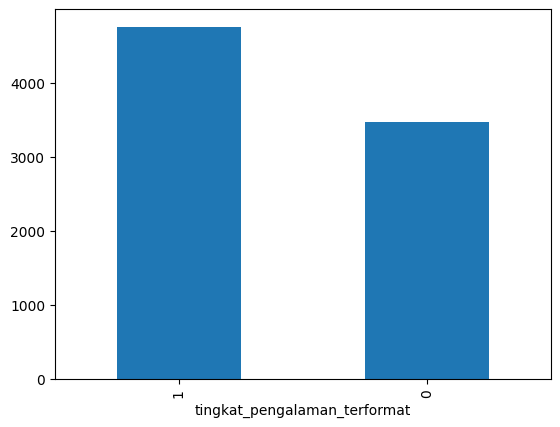

In [ ]:
#@title Target balance

display(target.value_counts().plot(kind='bar'))

,Accuracy
AdaBoostClassifier,0.752230
BaggingClassifier,0.774128
ExtraTreesClassifier,0.789132
RandomForestClassifier,0.796837


<Axes: >

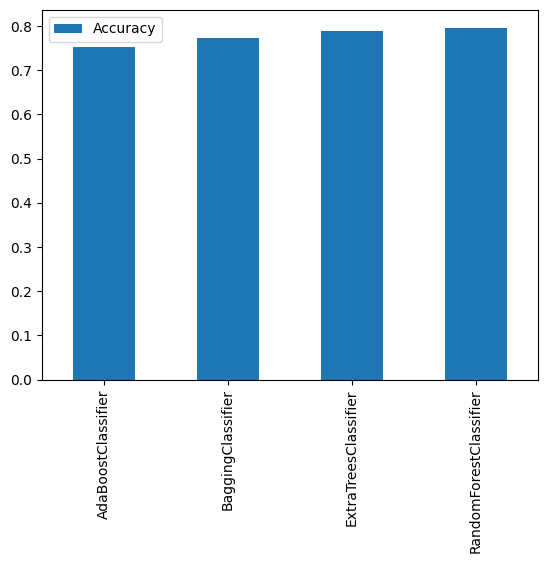

In [ ]:
#@title Model Selection

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

classifiers = {
    'AdaBoostClassifier': AdaBoostClassifier,
    'BaggingClassifier': BaggingClassifier,
    'ExtraTreesClassifier': ExtraTreesClassifier,
    'RandomForestClassifier': RandomForestClassifier
}

results = {}

for classifier in classifiers.keys():
  estimator = classifiers[classifier](random_state=42).fit(train_variables, train_target)
  predict_target = estimator.predict(test_variables)
  acc = accuracy_score(test_target, predict_target)
  results[classifier] = [acc]

display(
    pd.DataFrame(results).T.rename(columns={0: 'Accuracy'}),
    pd.DataFrame(results).T.rename(columns={0: 'Accuracy'}).plot(kind='bar')
)

pd.DataFrame(results).T.rename(columns={0: 'Accuracy'}).to_csv('base_estimator_comp.csv')

Akan dipilih `RandomForestClassifier` karena memiliki akurasi tertinggi yaitu 0.796837

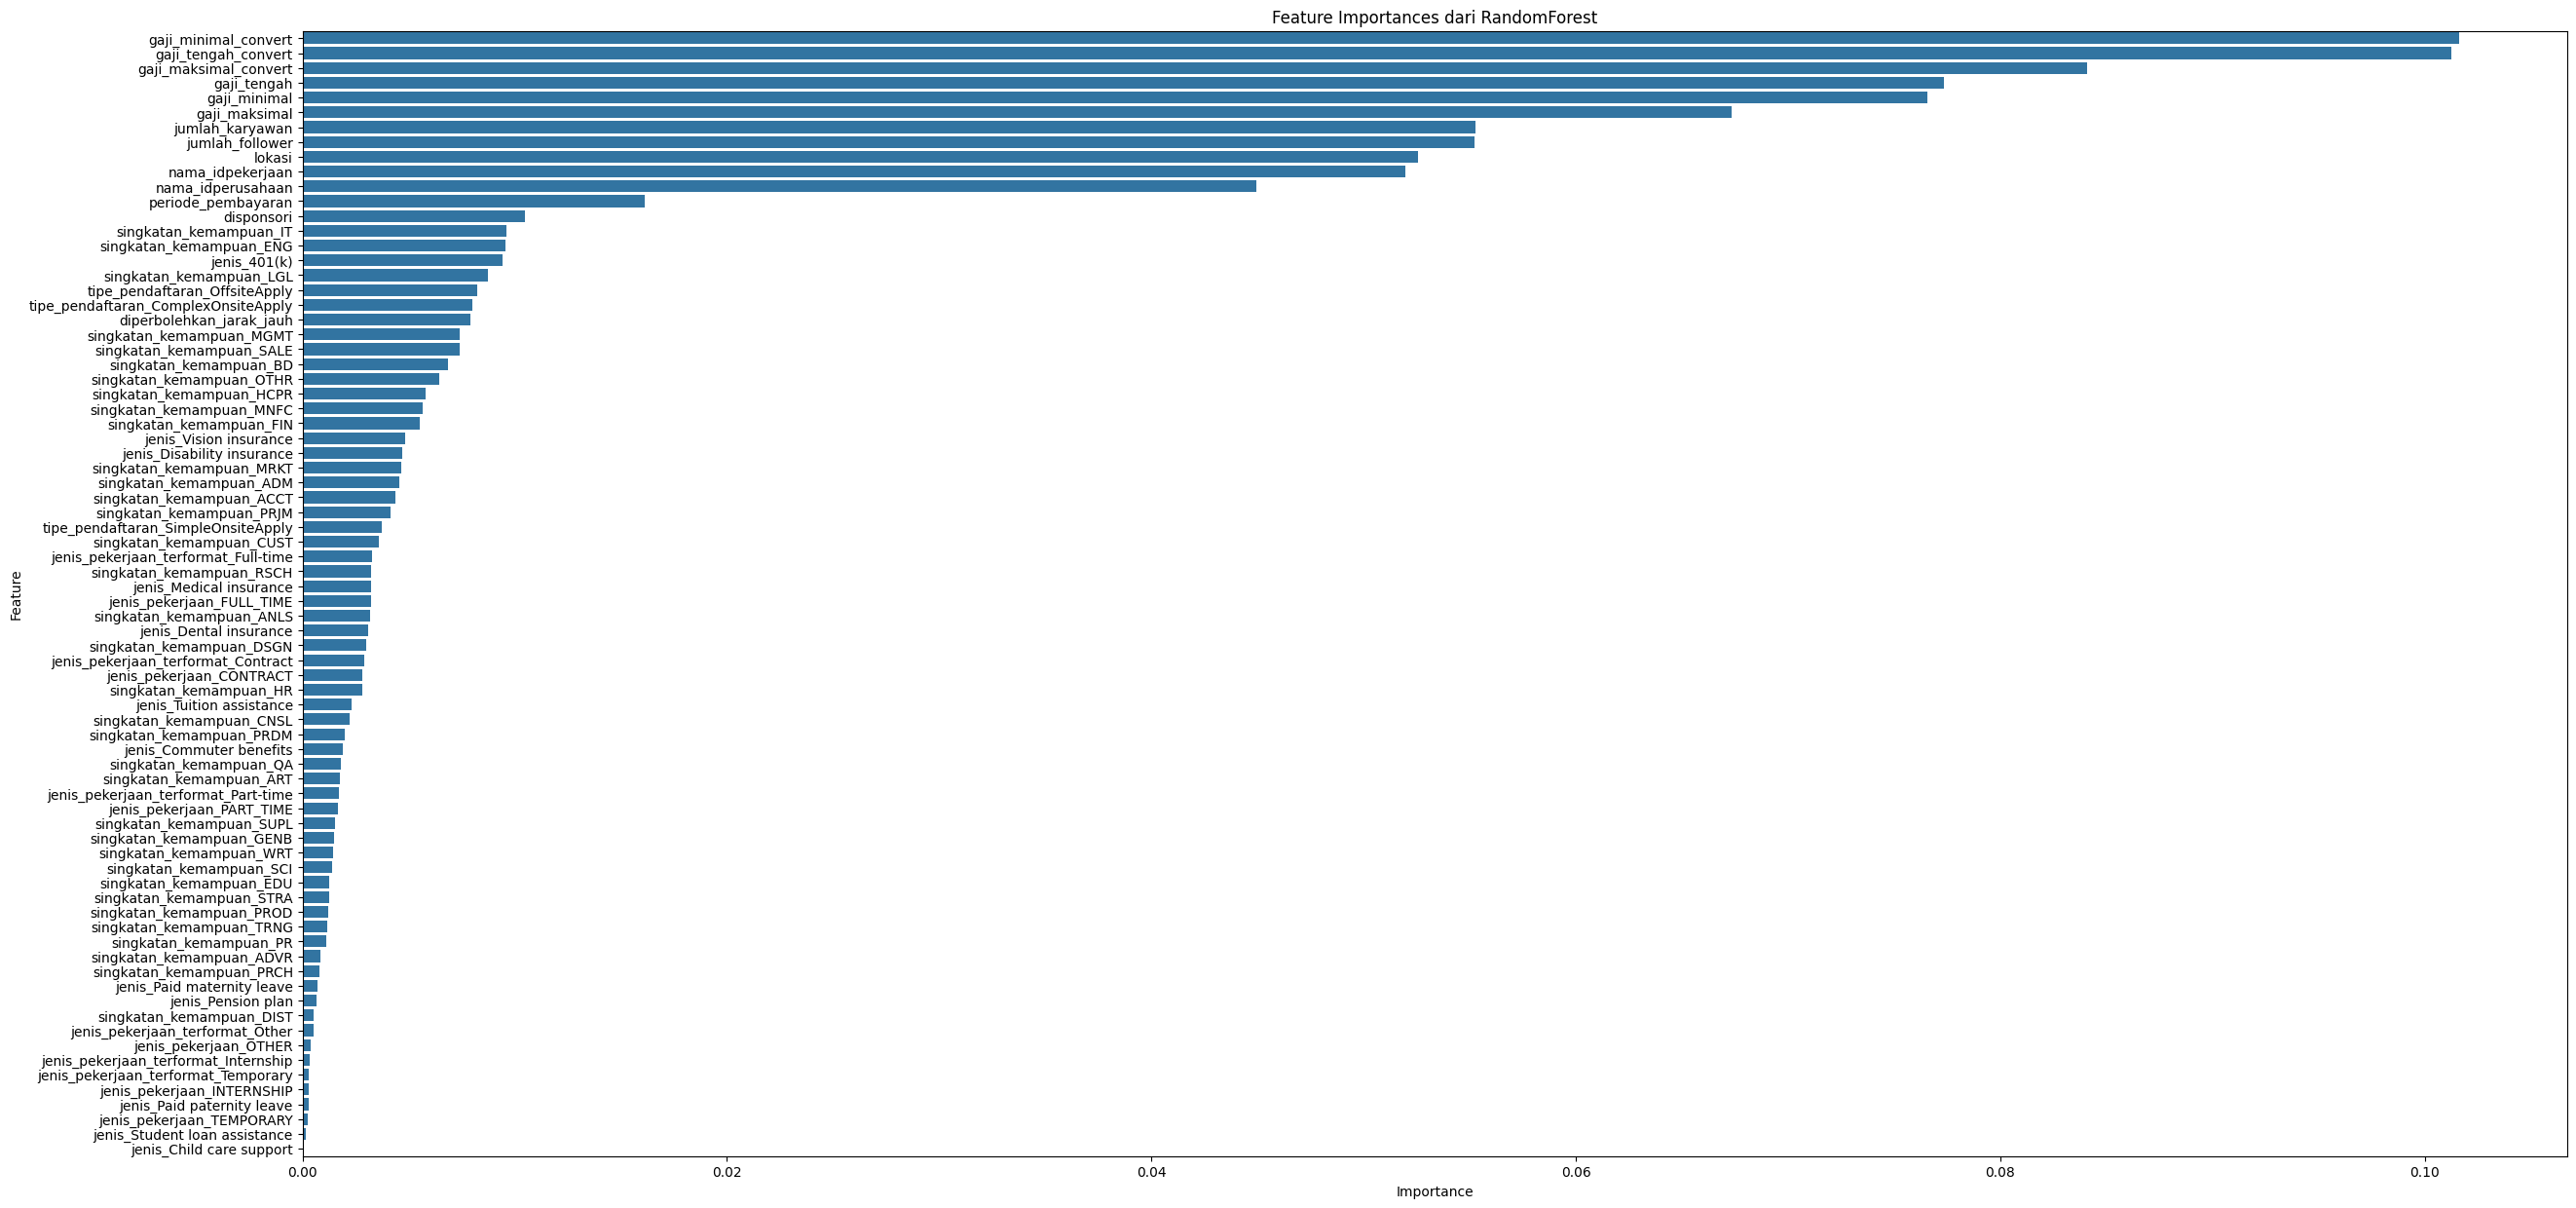

Akurasi: 0.79
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75      1016
         1.0       0.83      0.82      0.82      1450

    accuracy                           0.79      2466
   macro avg       0.79      0.79      0.79      2466
weighted avg       0.79      0.79      0.79      2466



In [ ]:
#@title Training
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Fit model dengan RandomForest untuk menentukan feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(train_variables, train_target)

# Fitur Importances
importances = rf.feature_importances_
feature_importances_rf = pd.DataFrame({'Feature': variables.columns, 'Importance': importances})
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

# Visualisasikan feature importances
plt.figure(figsize=(30, 15))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf)
plt.title('Feature Importances dari RandomForest')
plt.show()

# Select 20 Fitur Importances
important_features_rf = feature_importances_rf['Feature'][:20].values
X_train_selected = train_variables[important_features_rf]
X_test_selected = test_variables[important_features_rf]

# Fit model dengan RandomForest menggunakan fitur yang dipilih
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, train_target)
y_pred_rf = rf.predict(X_test_selected)

# Evaluasi model
accuracy = accuracy_score(test_target, y_pred_rf)
report = classification_report(test_target, y_pred_rf)

print(f'Akurasi: {accuracy:.2f}')
print('Classification Report:')
print(report)

In [ ]:
#@title Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV

# Parameter untuk RandomForest
param_dist_rf = {
    'n_estimators': np.arange(50, 100),
    'max_depth': [None] + list(np.arange(3, 5)),
    'min_samples_split': np.arange(2,5),
    'min_samples_leaf': np.arange(1,5),
    'bootstrap': [True, False]
}

# Model RandomForest
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy', random_state=42, verbose=2)
random_search_rf.fit(X_train_selected, train_target)

# Best Parameter & Best Score
print("Best parameters for RandomForest: ", random_search_rf.best_params_)
print("Best accuracy for RandomForest: ", random_search_rf.best_score_)

# Predict Best Model
best_model_rf = random_search_rf.best_estimator_
y_pred_rf_hp = best_model_rf.predict(X_test_selected)

# Evaluasi model terbaik
accuracy_rf = accuracy_score(test_target, y_pred_rf_hp)
report_rf = classification_report(test_target, y_pred_rf_hp)

print(f'Akurasi RandomForest setelah hyperparameter tuning: {accuracy_rf:.2f}')
print('Classification Report RandomForest:')
print(report_rf)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for RandomForest:  {'n_estimators': 93, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best accuracy for RandomForest:  0.772776035961168
Akurasi RandomForest setelah hyperparameter tuning: 0.80
Classification Report RandomForest:
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75      1016
         1.0       0.83      0.83      0.83      1450

    accuracy                           0.80      2466
   macro avg       0.79      0.79      0.79      2466
weighted avg       0.80      0.80      0.80      2466



### Evaluasi

In [ ]:
#@title Model Evaluation Training
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from math import sqrt
from IPython.display import HTML

# Evaluasi Model
cross_val = cross_val_score(best_model_rf, X_train_selected, train_target).mean()
accuracy = accuracy_score(test_target, y_pred_rf_hp)
precision = precision_score(test_target, y_pred_rf_hp, average='weighted')
recall = recall_score(test_target, y_pred_rf_hp, average='weighted')
f1 = f1_score(test_target, y_pred_rf_hp, average='weighted')

eval_df = pd.DataFrame({'Accuracy': [accuracy],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F1-Score': [f1],
                        'Cross Validation': [cross_val]})

display(eval_df.style.set_caption("Model Evaluation"))

,Accuracy,Precision,Recall,F1-Score,Cross Validation
0,0.796026,0.796056,0.796026,0.796041,0.772776


In [ ]:
#@title Model Evaluation Output to CSV
eval_df.to_csv('model_eval.csv', index=False)
eval_metrics.to_csv('eval_metrics.csv', index=False)

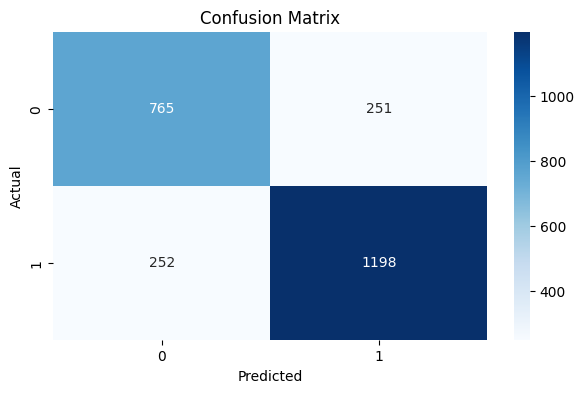

In [ ]:
#@title Confusion Matrix Training
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_target, y_pred_rf_hp)

plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_target), yticklabels=np.unique(test_target))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Confusion Matrix Output to CSV
cm_df = pd.DataFrame(cm, columns=['Predicted False', 'Predicted True'], index=['Actual False', 'Actual True'])
cm_df = cm_df.reset_index().melt(id_vars='index')
cm_df.columns = ['Actual', 'Predicted', 'Count']
cm_df.to_csv('confusion_matrix.csv', index=False)

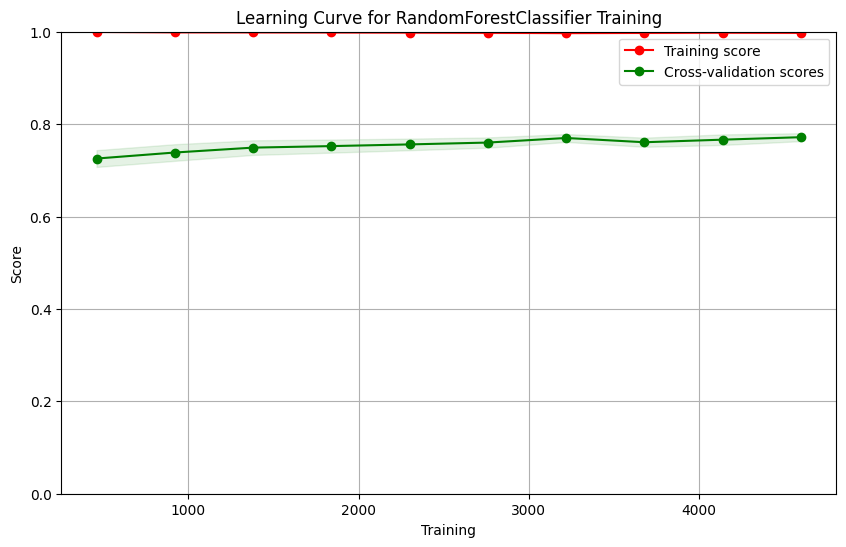

In [ ]:
#@title Learning Curves Training
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model_rf,
    X_train_selected,
    train_target,
    cv=5,
    n_jobs=-1,
    scoring = 'accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Mean & Standard Deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Curve
plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation scores")

plt.title('Learning Curve for RandomForestClassifier Training')
plt.xlabel('Training')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.ylim([0, 1])

plt.show()

In [ ]:
#@title Learning Curve Output to CSV
learning_curve_df = pd.DataFrame({
    'Train Size': train_sizes,
    'Train Scores Mean': np.mean(train_scores, axis=1),
    'Train Scores Std': np.std(train_scores, axis=1),
    'Test Scores Mean': np.mean(test_scores, axis=1),
    'Test Scores Std': np.std(test_scores, axis=1)
})

learning_curve_df.to_csv('learning_curve.csv', index=False)

## Prediction

In [ ]:
#@title Model setup

final_model = best_model_rf
final_model

RandomForestClassifier(min_samples_split=3, n_estimators=93, random_state=42)

,gaji_minimal_convert,gaji_tengah_convert,gaji_maksimal_convert,gaji_tengah,gaji_minimal,gaji_maksimal,jumlah_karyawan,jumlah_follower,lokasi,nama_idpekerjaan,...,periode_pembayaran,disponsori,singkatan_kemampuan_IT,singkatan_kemampuan_ENG,jenis_401(k),singkatan_kemampuan_LGL,tipe_pendaftaran_OffsiteApply,tipe_pendaftaran_ComplexOnsiteApply,diperbolehkan_jarak_jauh,tingkat_pengalaman_terformat
13,0.012501,0.012772,0.012999,0.454907,0.483217,0.446907,0.000062,6.457137e-05,0.720019,0.035052,...,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"Internship, Entry level, Associate"
16,0.007559,0.007438,0.007337,0.000064,0.000087,0.000066,0.000058,8.931484e-05,0.480635,0.061856,...,0.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"Internship, Entry level, Associate"
18,0.014584,0.016085,0.017333,0.572863,0.563763,0.595896,0.001041,3.765775e-04,0.665422,0.968385,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"Mid-Senior level, Director, Executive"
40,0.010417,0.016085,0.020800,0.572863,0.402671,0.715087,0.000004,4.435636e-04,0.665422,0.705155,...,1.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,"Internship, Entry level, Associate"
69,0.012501,0.011826,0.011266,0.421205,0.483217,0.387312,0.000037,6.460273e-06,0.300047,0.819931,...,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"Internship, Entry level, Associate"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10892,0.030005,0.027251,0.024961,0.080817,0.096597,0.071455,0.000000,0.000000e+00,0.884741,0.094158,...,0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,"Mid-Senior level, Director, Executive"
10893,0.005459,0.005339,0.005240,0.000027,0.000046,0.000030,0.000000,4.704082e-07,0.871675,0.335395,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"Internship, Entry level, Associate"
10894,0.021003,0.019075,0.017472,0.000270,0.000344,0.000238,0.000244,5.682531e-05,0.606626,0.869416,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"Mid-Senior level, Director, Executive"
10895,0.007708,0.007473,0.007278,0.266177,0.297962,0.250242,0.000048,1.765599e-05,0.009333,0.813746,...,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"Internship, Entry level, Associate"


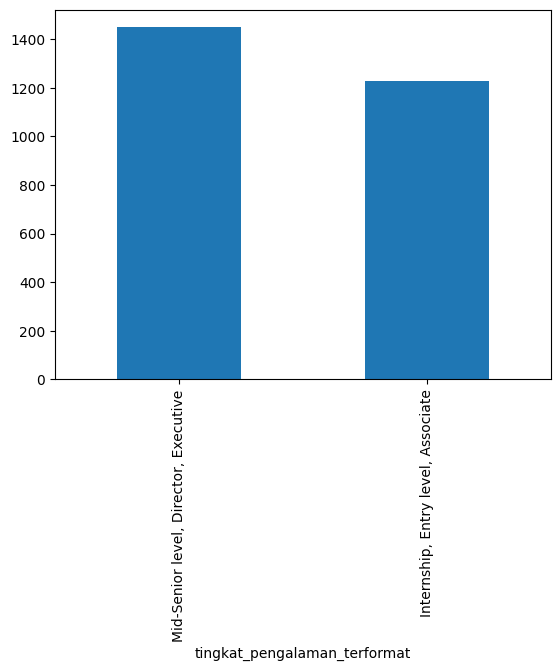

In [ ]:
#@title Unknown Target Prediction

data_prediction = data_target_unknown[important_features_rf].copy()
data_prediction['tingkat_pengalaman_terformat'] = final_model.predict(data_prediction)
data_prediction['tingkat_pengalaman_terformat'] = data_prediction['tingkat_pengalaman_terformat'].map({0: 'Internship, Entry level, Associate', 1: 'Mid-Senior level, Director, Executive'})

display(data_prediction)

data_prediction['tingkat_pengalaman_terformat'].value_counts().plot(kind='bar')
plot_show()

pd.DataFrame(data_prediction['tingkat_pengalaman_terformat'].value_counts()).reset_index().to_csv('unknown_prediction.csv')

In [ ]:
#@title Individual prediction

index = np.random.choice(data_prediction.index)
to_predict = data_prediction.drop('tingkat_pengalaman_terformat', axis='columns').loc[[index]]
print('Data to predict:')
display(to_predict)
print('\nPredicted Level:')

prediction = final_model.predict(to_predict)
if prediction == 0:
  print('Internship, Entry level, Associate')
else:
  print('Mid-Senior level, Director, Executive')

Data to predict:


,gaji_minimal_convert,gaji_tengah_convert,gaji_maksimal_convert,gaji_tengah,gaji_minimal,gaji_maksimal,jumlah_karyawan,jumlah_follower,lokasi,nama_idpekerjaan,nama_idperusahaan,periode_pembayaran,disponsori,singkatan_kemampuan_IT,singkatan_kemampuan_ENG,jenis_401(k),singkatan_kemampuan_LGL,tipe_pendaftaran_OffsiteApply,tipe_pendaftaran_ComplexOnsiteApply,diperbolehkan_jarak_jauh
8830,0.029338,0.027347,0.031375,0.928889,0.817193,0.765421,0.157469,0.288168,0.035464,0.854296,0.453237,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0



Predicted Level:
Mid-Senior level, Director, Executive


## Kesimpulan

In [ ]:
#@title Used Features

important_features_rf

array(['gaji_minimal_convert', 'gaji_tengah_convert',
       'gaji_maksimal_convert', 'gaji_tengah', 'gaji_minimal',
       'gaji_maksimal', 'jumlah_karyawan', 'jumlah_follower', 'lokasi',
       'nama_idpekerjaan', 'nama_idperusahaan', 'periode_pembayaran',
       'disponsori', 'singkatan_kemampuan_IT', 'singkatan_kemampuan_ENG',
       'jenis_401(k)', 'singkatan_kemampuan_LGL',
       'tipe_pendaftaran_OffsiteApply',
       'tipe_pendaftaran_ComplexOnsiteApply', 'diperbolehkan_jarak_jauh'],
      dtype=object)

Dari list tersebut, diperoleh informasi-informasi yang dibutuhkan untuk memprediksi tingkat pengalaman suatu pekerjaan adalah:
- Rentang Upah
- Periode Pembayaran
- Industri Pekerjaan dan Perusahaan
- Jumlah Karyawan dan Follower Perusahaan
- Iya/Tidaknya Disponsori
- Skill-skill yang dibutuhkan
- Tipe pendaftaran
- Boleh/Tidaknya Jarak Jauh

Kemudian dapat dibentuk suatu sistem prediksi tingkat pengalaman pekerjaan otomatis yang yang menerima informasi-informasi tersebut sebagai input dan meng-output tingkat pengalaman pekerjaan yang sesuai

### Model Performance

Dari bagian sebelumnya, terlihat bahwa model terbaik yang diperoleh memiliki akurasi 80%. Hal ini didukung oleh grafik *learning curve* yang juga terlihat konvergen ke nilai 80%. Selain itu, nilai *cross validation* juga mendekati nilai 80%. Dari nilai-nilai tersbut, dapat dikatakan model prediksi tingkat pengalaman cukup baik namun tidak sempurna. Dapat diperoleh 2 kemungkinan dari hal tersebut

- Dataset yang dimiliki kurang memadai. Hal ini didukung oleh beberapa hal pada dataset yang memiliki distribusi tidak normal dan/atau tidak seimbang
- Terdapat variabel yang tidak diketahui dan tidak terdapat pada dataset dimana variabel tersbut mempengaruhi tingkat pengalaman suatu pekerjaan secara signifikan